In [174]:
#Importar pymongo que permite la conexion con la base de datos en mongo
import pymongo
import matplotlib.pyplot as plt
import numpy as np
plt.style.available

#Aqui se establece la conexion con la base de datos, por defecto se conecta al puerto 27017 del localhost
client = pymongo.MongoClient() 
db = client.Oly
events = db.eventos.find()
people = {}
months = {}
monthsPerDate = {}

def bringDate(date):
    if(date == "01"): return "Enero"
    if(date == "02"): return "Febrero"
    if(date == "03"): return "Marzo"
    if(date == "04"): return "Abril"
    if(date == "05"): return "Mayo"
    if(date == "06"): return "Junio"
    if(date == "07"): return "Julio"
    if(date == "08"): return "Agosto"
    if(date == "09"): return "Septiembre"
    if(date == "10"): return "Octubre"
    if(date == "11"): return "Noviembre"
    if(date == "12"): return "Diciembre"
    
def bringCareer(studentCode):
    careerCode = studentCode[-3:]
    career = ""
    if(careerCode == "010"): career = "Ingenieria de Sistemas"
    if(careerCode == "004"): career = "Ingenieria de Procesos"
    if(careerCode == "085"): career = "Ingenieria de Diseño de producto"
    if(careerCode == "168"): career = "Psicologia"
    if(careerCode == "012"): career = "Ingenieria de Produccion"
    if(careerCode == "015"): career = "Geologia"
    if(careerCode == "183"): career = "Biologia"
    if(careerCode == "003"): career = "Economia"
    if(careerCode == "169"): career = "Mercadeo"
    if(careerCode == "199"): career = "Finanzas"
    if(careerCode == "101"): career = "Ingenieria matematica"
    if(careerCode == "111"): career = "Ciencias Politicas"
    if(careerCode == "112"): career = "Comunicacion Social"
    if(careerCode == "113"): career = "Ingenieria Fisica"
    if(careerCode == "083"): career = "Musica"
    if(careerCode == "084"): career = "Derecho"
    if(careerCode == "001"): career = "Administracion de Negocios"
    if(careerCode == "002"): career = "Negocios Internacionales"
    if(careerCode == "011"): career = "Contaduria publica"
    if(careerCode == "013"): career = "Ingenieria Civil"
    if(careerCode == "014"): career = "Ingenieria Mecanica"   
    
    return career
    

for event in events:
    date = event["fecha"]
    date = date[3:5]
    date = bringDate(date)
    try:   
        monthsPerDate[date] += len(event["participantes"])
        months[date] +=1 
    except:
        months[date] = 1
        monthsPerDate[date] = len(event["participantes"])
    
    for member in event["participantes"]:
        def checkError():
            try:
                 people[event["deporte"]["nombre"]] 
            except: 
                  return -1
        if ( checkError() == -1 ):
            people[event["deporte"]["nombre"]] = {bringCareer(member["codigo"]) : 1}
        else:
            try:
                people[event["deporte"]["nombre"]][bringCareer(member["codigo"])] += 1
            except:
                people[event["deporte"]["nombre"]].update({bringCareer(member["codigo"]) : 1})
        
                

print (months)


{'Noviembre': 2, 'Diciembre': 3}


In [175]:
finalCareers = []
timesCareers = []
keepSaveGraphs = []

for key , value in people.items():
    for keey , valuee in value.items():
        finalCareers.append(keey)
        timesCareers.append(valuee)
    keepSaveGraphs.append((finalCareers,timesCareers,key))
    timesCareers = []
    finalCareers = []

In [176]:
specificMonth = []
times = []
for month,time in months.items():
    specificMonth.append(month)
    times.append(time)
    
print(times)
print(specificMonth)

[2, 3]
['Noviembre', 'Diciembre']


# ESTA GRAFICA MUESTRA LA CANTIDAD DE EVENTOS QUE SE HAN REALIZADO SEGUN EL MES

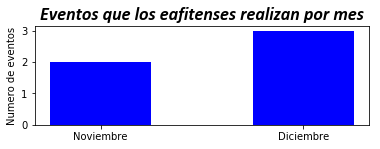

In [177]:

fig = plt.figure()
ax1 = fig.add_subplot(211)
xx = range(1,len(times)+1)
ax1.bar(xx, times, width = 0.5, color = (0,0,1) , align = 'center')
ax1.set_xticks(xx)
ax1.set_xticklabels(specificMonth)
ax1.set_ylabel('Numero de eventos')
plt.title("Eventos que los eafitenses realizan por mes", fontname='Calibri', fontsize=18,
            fontstyle='italic', fontweight='bold',
            color='black')
plt.show()

# ESTA GRAFICA MUESTRA EL NUMERO DE PERSONAS QUE ASISTIERON A CUALQUIER EVENTO POR MES

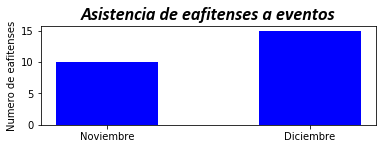

In [178]:
datesTime = []
for key, value in monthsPerDate.items():
    datesTime.append(value)
fig = plt.figure()
ax1 = fig.add_subplot(211)
xx = range(1,len(datesTime)+1)
ax1.bar(xx, datesTime, width = 0.5, color = (0,0,1) , align = 'center')
ax1.set_xticks(xx)
ax1.set_xticklabels(specificMonth)
ax1.set_ylabel('Numero de eafitenses')
plt.title("Asistencia de eafitenses a eventos", fontname='Calibri', fontsize=18,
            fontstyle='italic', fontweight='bold',
            color='black')
plt.show()
    

# GRAFICAS QUE MUESTRAN EL PORCENTAJE DE PERSONAS EN UNA CARRERA Y QUE                                                    JUEGAN UN DEPORTE ESPECIFICO.

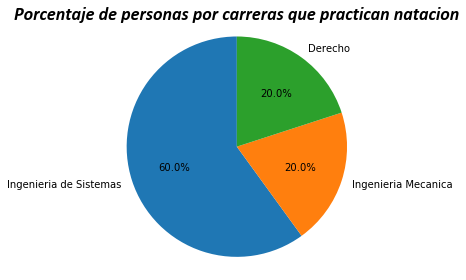

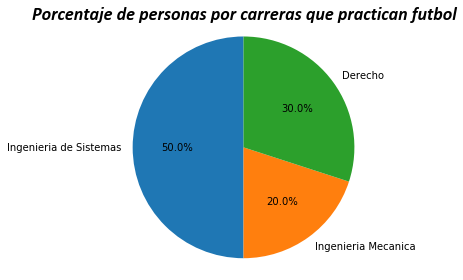

In [179]:

for graph in keepSaveGraphs:
    plt.title("Porcentaje de personas por carreras que practican " + graph[2], fontname='Calibri', fontsize=18,
            fontstyle='italic', fontweight='bold',
            color='black')
    plt.pie(graph[1],labels=graph[0], shadow = False , autopct = '%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    